## BLACK FRIDAY DATASET EDA AND FEATURE ENGINEERING 

Focus on: Cleaning , preparing data for model training and then testing the data 

## PROBLEM STATEMENT:
A Retail Company wants to understand the customer purchase behaviour against vartious products of different categories.
They have shared purchase summary of various customers that have selected high volume products last month. The dataset also 
contains customer demogrpahics , product details and total purchase amount for the last month

Now the want to build the model that predicts the purchase amount of customer against various products which will help them to create personalized offer for customers against different products

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
# importing the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [27]:
# Exploring the training dataset:
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [28]:
# Exploring the testing dataset:
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [29]:
# MERGING TWO DATA SETS TO EXPLORE THE DATA:
data = train_data._append(test_data)            #METHOD 1
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [30]:
data1 = pd.concat([train_data,test_data],ignore_index=True)     # METHOD 2
data1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


## EXPLORING DEEP INTO THE FEATURES OF THE DATASET

In [32]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

## HANDLING CATEGORICAL VALUES

In [33]:
data['Age'].value_counts()

Age
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: count, dtype: int64

In [34]:
data['Gender'].value_counts()

Gender
M    590031
F    193636
Name: count, dtype: int64

In [35]:
data['City_Category'].value_counts()

City_Category
B    329739
C    243684
A    210244
Name: count, dtype: int64

In [36]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [37]:
data.drop(['User_ID'],axis=1,inplace=True)

In [38]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [39]:
data['Occupation'].value_counts().sort_values()

Occupation
8       2189
9       8929
18      9367
13     11053
19     11919
11     16593
15     17356
5      17373
10     18304
3      25126
6      29102
16     36122
2      37996
14     38782
12     44448
20     47840
17     57418
1      67687
7      84127
0      98850
4     103086
Name: count, dtype: int64

In [40]:
data['Marital_Status'].value_counts()

Marital_Status
0    462538
1    321129
Name: count, dtype: int64

In [41]:
data['Gender'] = data['Gender'].map({
    'F':0,
    "M":1
})

In [42]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [43]:
data.Age.value_counts()

Age
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: count, dtype: int64

In [44]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [45]:
data['Age'] = data['Age'].map(
    {
        '0-17': 1,
        '18-25': 2,
        "26-35": 3,
        '36-45': 4,
        '46-50': 5,
        '51-55': 6,
        "55+": 7
    }
)

In [46]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [47]:
data.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [48]:
data['City_Category'] = data['City_Category'].map(
    {
        'A': 1,
        "B": 2,
        "C": 3 
    }
)

In [49]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,3,4+,0,8,NaN,NaN,7969.0


## HANDLING MISSING VALUES

In [50]:
for c in data.columns:
    if data[c].isnull().sum() > 0:
        print(c,'', data[c].isnull().sum())

# THIS SHOWS THAT PRODUCT CATEGORIES 2 AND 3 AND TOTAL PURCHASE VALUE HAVE MISSING VALUES

Product_Category_2  245982
Product_Category_3  545809
Purchase  233599


In [51]:
# FOCUS ON REPLACING MISSING VALUES IN PRODUCT CATEGORIES 2 AND 3 
# THIS DATA SET IS COMBINED WITH TEST DATA SO PURCHASE NULL VALUES LINK TO THEM 
# FILLING THE DISCRETE VALUES WITH MOST OCCURRED VALUE(MODE)

In [52]:
# GETTING MODE VALUES:
print(int(data['Product_Category_2'].mode()),int(data['Product_Category_3'].mode()))

8 16


C:\Users\Admin\AppData\Local\Temp\ipykernel_17620\3136505338.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(int(data['Product_Category_2'].mode()),int(data['Product_Category_3'].mode()))


In [53]:
# GETTING MAX VALUES:
print(int(data['Product_Category_2'].max()),int(data['Product_Category_3'].max()))

18 18


In [54]:
# GETTING MIN VALUES:
print(int(data['Product_Category_2'].min()),int(data['Product_Category_3'].min()))

2 3


In [55]:
data['Product_Category_2'] = data['Product_Category_2'].fillna(data['Product_Category_2'].mode()[0])

In [56]:
data['Product_Category_3'] = data['Product_Category_3'].fillna(data['Product_Category_3'].mode()[0])

In [57]:
data['Product_Category_2'].isnull().sum()

np.int64(0)

In [58]:
data['Product_Category_3'].isnull().sum()

np.int64(0)

In [59]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [60]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].map(
    {
        "0" : 0,
        '1' : 1,
        "2" : 2,
        "3" : 3,
        "4+" : 4
    }
)

In [61]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,3,4,0,8,8.0,16.0,7969.0


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 71.7+ MB


## DATA VISUALISATION
Visualising the purchase with different given parameters
Here purchase value is the target variable 

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

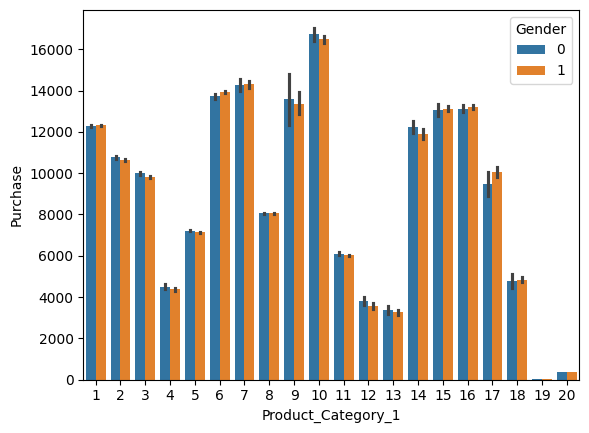

In [85]:
sns.barplot(x='Product_Category_1',y="Purchase",data=data,hue='Gender')

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

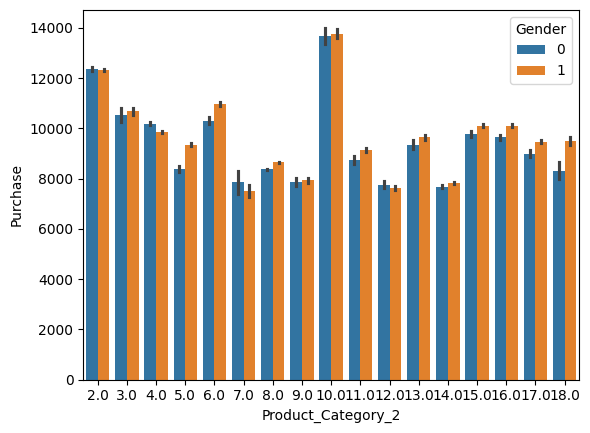

In [86]:
sns.barplot(x='Product_Category_2',y="Purchase",data=data,hue='Gender')

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

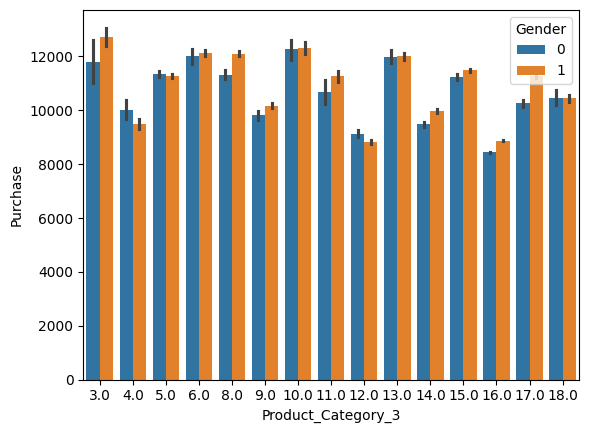

In [87]:
sns.barplot(x='Product_Category_3',y="Purchase",data=data,hue='Gender')

<Axes: xlabel='Occupation', ylabel='Purchase'>

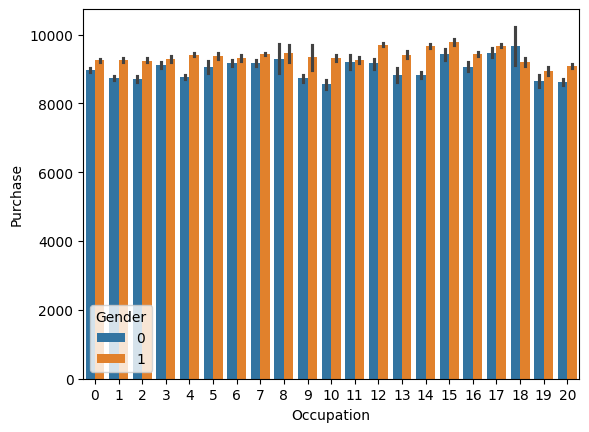

In [88]:
sns.barplot(x='Occupation',y="Purchase",data=data,hue='Gender')

<Axes: xlabel='City_Category', ylabel='Purchase'>

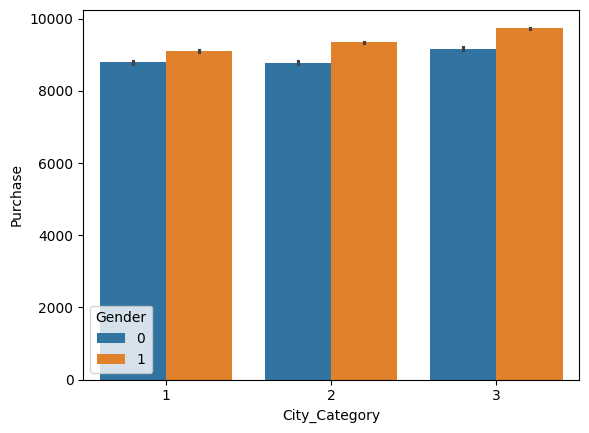

In [89]:
sns.barplot(x='City_Category',y="Purchase",data=data,hue='Gender')

<Axes: xlabel='Age', ylabel='Purchase'>

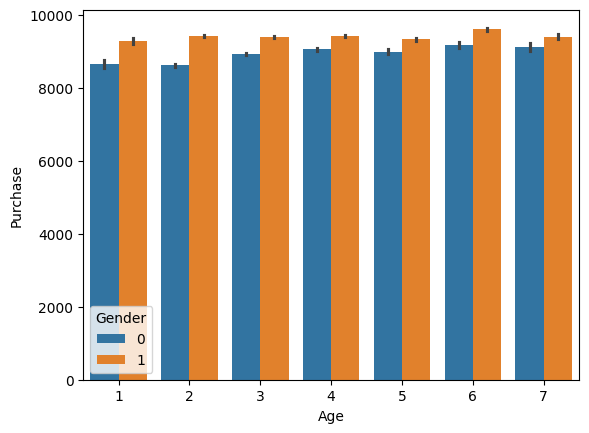

In [90]:
sns.barplot(x='Age',y="Purchase",data=data,hue='Gender')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

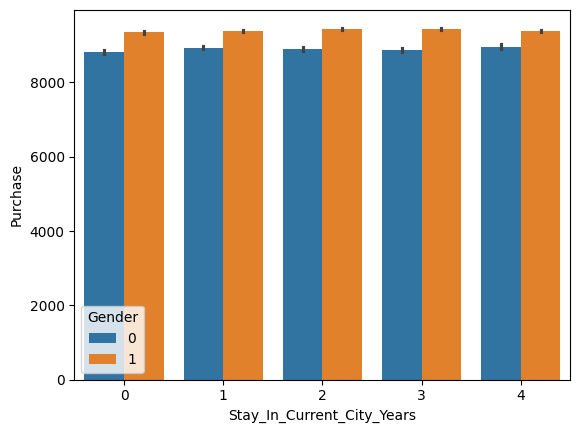

In [91]:
sns.barplot(x='Stay_In_Current_City_Years',y="Purchase",data=data,hue='Gender')

<Axes: xlabel='Purchase', ylabel='count'>

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


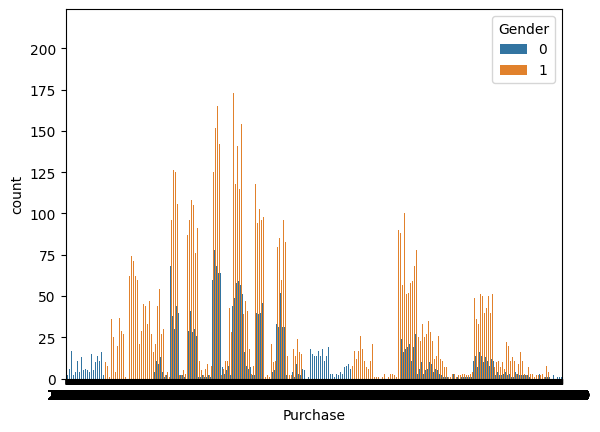

In [ ]:
sns.countplot(data=data,x='Purchase',hue='Gender')

<Axes: xlabel='Age', ylabel='count'>

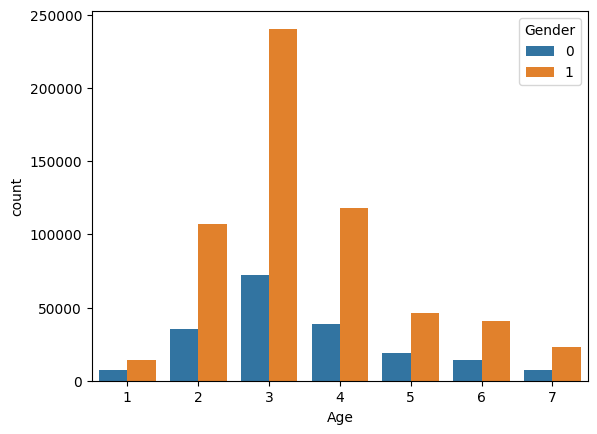

In [ ]:
sns.countplot(data=data,x='Purchase',hue='Age')

<Axes: xlabel='Age', ylabel='Purchase'>

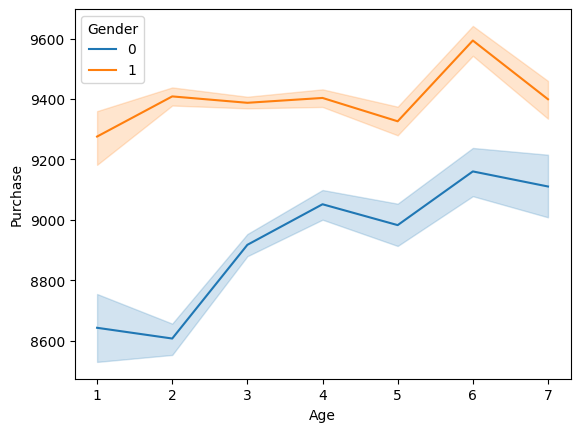

In [96]:
sns.lineplot(data=data,x='Age',y='Purchase',hue='Gender')

## FEATURE SCALING

In [63]:
test = data[data['Purchase'].isnull() == True]

In [64]:
test

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,1,5,7,2,2,1,1,11.0,16.0,NaN
1,P00113442,1,3,17,3,0,0,3,5.0,16.0,NaN
2,P00288442,0,4,1,2,4,1,5,14.0,16.0,NaN
3,P00145342,0,4,1,2,4,1,4,9.0,16.0,NaN
4,P00053842,0,3,1,3,1,0,4,5.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,2,4,1,8,8.0,16.0,NaN
233595,P00254642,0,3,15,2,4,1,5,8.0,16.0,NaN
233596,P00031842,0,3,15,2,4,1,1,5.0,12.0,NaN
233597,P00124742,0,5,1,3,4,0,10,16.0,16.0,NaN


In [65]:
test.Purchase.unique()

array([nan])

In [66]:
train = data[data['Purchase'].isnull() == False]

In [68]:
test.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,1,5,7,2,2,1,1,11.0,16.0,NaN
1,P00113442,1,3,17,3,0,0,3,5.0,16.0,NaN
2,P00288442,0,4,1,2,4,1,5,14.0,16.0,NaN
3,P00145342,0,4,1,2,4,1,4,9.0,16.0,NaN
4,P00053842,0,3,1,3,1,0,4,5.0,12.0,NaN


In [69]:
train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,3,4,0,8,8.0,16.0,7969.0


In [92]:
X = train.iloc[:,1:10]
X

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,1,10,1,2,0,3,8.0,16.0
1,0,1,10,1,2,0,1,6.0,14.0
2,0,1,10,1,2,0,12,8.0,16.0
3,0,1,10,1,2,0,12,14.0,16.0
4,1,7,16,3,4,0,8,8.0,16.0
...,...,...,...,...,...,...,...,...,...
550063,1,6,13,2,1,1,20,8.0,16.0
550064,0,3,1,3,3,0,20,8.0,16.0
550065,0,3,15,2,4,1,20,8.0,16.0
550066,0,7,1,3,2,0,20,8.0,16.0


In [93]:
X.shape

(550068, 9)

In [94]:
y = train.iloc[:,-1]

In [95]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [96]:
y.shape

(550068,)

In [97]:
from sklearn.model_selection import train_test_split



X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [98]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [99]:
### TRAINING THE MODEL